                                      Projet Big Data Mining

---


    Classification dans un contexte déséquilibré : Une application à la fraude bancaire


---


                            Clément PERENON, Léa REGAZZETTI
                  M2 SISE - Promotion 2021/2022 - Université Lumière Lyon 2

# Introduction

Ce projet s'intègre dans le cadre de notre cours de fouille de données massives. Il a pour but de travailler sur des données réelles, et plus précisément sur des données issues d’une enseigne de la grande distribution ainsi que de certains organismes bancaires. Ainsi, les données représentent les transactions bancaires effectuées par chèque dans un magasin de l’enseigne quelque part en France. 
L'objectif de ce projet est la prédiction de la variable FlagImpaye, qui ne peut prendre que 2 valeurs :


*   0 : la transaction est acceptée et considérée comme "normale"
*   1 : la transaction est refusée car considérée comme "frauduleuse"    

# 1. Import et description des données

Pour commencer, il s'agit d'importer les données. Pour cela, nous utilisons la librairie **pandas**, permettant de manipuler facilement des données à analyser.

## 1.1. Import des données

In [1]:
# Répertoire de travail
import os
os.chdir('C:/Users/cleme/OneDrive/Cours M2 SISE/Big data mining/projet')

In [2]:
# Import des données
import pandas as pd
df = pd.read_csv("guillaume.txt", sep=";", decimal=",", low_memory=False, header = 0)

Nous avons ainsi importé le jeu de données dans une variable *df*, qui est un dataframe pandas. Ensuite, nous pouvons nous attarder sur la description des données, qui est une étape essentielle afin de bien comprendre les variables sur lesquelles nous allons travailler.

## 1.2. Description des données

Commençons par la volumétrie du jeu de données. En effet, nous savons que nous nous plaçons dans le cadre de données massives, mais à quel point.

In [3]:
df.shape

(4646774, 23)

Ainsi, nous pouvons voir que nous disposons de 23 variables observées sur plus de 4.5 millions de transactions. Voyons plus en détail les variables qui composent le jeu de données.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4646774 entries, 0 to 4646773
Data columns (total 23 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   ZIBZIN                    object
 1   IDAvisAutorisationCheque  object
 2   FlagImpaye                object
 3   Montant                   object
 4   DateTransaction           object
 5   CodeDecision              object
 6   VerifianceCPT1            object
 7   VerifianceCPT2            object
 8   VerifianceCPT3            object
 9   D2CB                      object
 10  ScoringFP1                object
 11  ScoringFP2                object
 12  ScoringFP3                object
 13  TauxImpNb_RB              object
 14  TauxImpNB_CPM             object
 15  EcartNumCheq              object
 16  NbrMagasin3J              object
 17  DiffDateTr1               object
 18  DiffDateTr2               object
 19  DiffDateTr3               object
 20  CA3TRetMtt                object
 21  CA3TR   

D'emblée, nous pouvons voir que toutes les variables sont de type **object**, il va donc falloir regarder plus en détail les données afin sans doute de les transformer dans le bon type. Pour cela, nous pouvons nous baser sur la description des données qui nous a été donnée :

• **ZIBZIN** : identifiant relatif à la personne, i.e. il s’agit de son identifiant bancaire (relatif au chéquier en cours d’utilisation)

• **IDAvisAutorisAtionCheque** : identifiant de la transaction en cours

• **Montant** : montant de la transaction

• **DateTransaction** : date de la transaction

• **CodeDecision** : il s’agit d’une variable qui peut prendre ici 4 valeurs



*   0 : la transaction a été acceptée par le magasin
*   1 : la transaction et donc le client fait partie d’une liste blanche (bons payeurs)
*   2 : le client fait d’une partie d’une liste noire, son historique indique cet un mauvais payer (des impayés en cours ou des incidents bancaires en cours), sa transaction est alors automatiquement refusée
*   3 : client ayant était arrêté par le système par le passé pour une raison plus ou moins fondée


• **VérifianceCPT1** : nombre de transactions effectuées par le même identifiant bancaire au cours du même jour

• **VérifianceCPT2** : nombre de transactions effectuées par le même identifiant bancaire au cours des trois derniers jours

• **VérifianceCPT3** : nombre de transactions effectuées par le même identifiant bancaire au cours des sept derniers jours

• **D2CB** : durée de connaissance du client (par son identifiant bancaire), en jours. Pour des contraintes légales, cette durée de connaissance ne peut excéder deux ans

• **ScoringFP1** : score d’anormalité du panier relatif à une première famille de produits (ex : denrées alimentaires)

• **ScoringFP2** : score d’anormalité du panier relatif à une deuxième famille de produits (ex : électroniques)

• **ScoringFP3** : score d’anormalité du panier relatif à une troisième famille de produits (ex : autres)

• **TauxImpNb_RB** : taux impayés enregistrés selon la région où a lieu la transaction

• **TauxImpNB_CPM** : taux d’impayés relatif au magasin où a lieu la transaction

• **EcartNumCheq** : différence entre les numéros de chèques

• **NbrMagasin3J** : nombre de magasins différents fréquentés les 3 derniers jours

• **DiffDateTr1** : écart (en jours) à la précédente transaction

• **DiffDateTr2** : écart (en jours) à l’avant dernière transaction

• **DiffDateTr3** : écart (en jours) à l’antépénultième transaction

• **CA3TRetMtt** : montant des dernières transactions + montant de la transaction en cours

• **CA3TR** : montant des trois dernières transactions

• **Heure** : heure de la transaction

• **FlagImpaye** : acception (0) ou refus de la transaction (1)

## 1.3. Visalisation des données

En plus de la description des variables, nous pouvons visualiser les premières lignes du jeu de données.

In [5]:
df.head(10)

,ZIBZIN,IDAvisAutorisationCheque,FlagImpaye,Montant,DateTransaction,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,...,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure
0,A013010004908126703060931,78643044,0,20,2017-02-01 07:32:14,1,0,0,0,551,...,"37,186667890919111","52,076033757361408",0,1,4,4,4,20,0,27134
1,A013011306908024927155000,78643045,0,20,2017-02-01 07:43:37,1,0,0,0,551,...,"48,844716275908937","52,076033757361408",1,2,"1,7976851851851852",4,4,"28,609999999999999","8,6099999999999994",27817
2,A013010002908283134592527,78643046,0,"57,640000000000001",2017-02-01 07:47:38,1,0,0,0,549,...,"73,118279569892479","52,076033757361408",0,1,4,4,4,"57,640000000000001",0,28058
3,A011010002908105209831316,78643047,0,"54,289999999999999",2017-02-01 07:48:48,0,1,1,1,267,...,"110,05692599620494","53,554233554497365",0,1,4,4,4,"54,289999999999999",0,28128
4,A013010041908000125652029,78643048,0,"26,899999999999999",2017-02-01 08:13:27,1,0,0,0,549,...,"45,36831264567185","52,076033757361408",1,1,"1,9971064814814814",4,4,"59,149999999999999","32,25",29607
5,A044014706908021215591000,78643049,0,"42,509999999999998",2017-02-01 08:13:53,1,0,0,0,523,...,"24,223058289955162","27,448962086121117",0,1,4,4,4,"42,509999999999998",0,29633
6,A059010041908012913210426,78643050,0,"50,840000000000003",2017-02-01 08:18:24,1,0,0,0,551,...,"44,775178154758152","52,076033757361408",0,1,4,4,4,"50,840000000000003",0,29904
7,A013000077908491210714030,78643051,0,"87,140000000000001",2017-02-01 08:19:28,1,0,0,0,547,...,"30,935808197989171","52,076033757361408",0,1,4,4,4,"87,140000000000001",0,29968
8,A055054707908007521756697,78643052,0,40,2017-02-01 08:20:13,1,0,0,0,548,...,0,"35,493265380414996",0,1,4,4,4,40,0,30013
9,A013010041908001298460129,78643053,0,"90,590000000000003",2017-02-01 08:24:09,1,0,0,0,538,...,"45,36831264567185","52,076033757361408",0,1,4,4,4,"90,590000000000003",0,30249


Il y a bien quelques transformations préliminaires à réaliser. En effet, la pluplart des variables sont en réalité quantitatives.

# 2. Pré-traitements des données

## 2.1. Recodage des variables

Dans un premier temps, nous allons modifier le type des variables afin qu'il corresponde plus aux données. Lorsque nous avons voulu faire cela, nous nous sommes aperçus qu'une transaction posait problème.

In [6]:
df.iloc[[1956360, 1956361],: ]

,ZIBZIN,IDAvisAutorisationCheque,FlagImpaye,Montant,DateTransaction,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,...,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure
1956360,ZIBZIN,IDAvisAutorisationCheque,FlagImpaye,Montant,DateTransaction,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,...,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure
1956361,A011010002908105209831316,78643047,0,"54,289999999999999",2017-02-01 07:48:48,0,1,1,1,267,...,"110,05692599620494","53,554233554497365",0,1,4,4,4,"54,289999999999999",0,28128


En effet, la transaction portant l'indice 1956360 est composée des noms des variables. Nous avons donc supprimé cette ligne. Pour cela, nous avons d'abord choisi la méthode qui consiste tout simplement à supprimer cette transaction dans le dataframe, seulement ensuite il nous fallait convertir toutes les variables dans le bon type. Nous avons alors choisi une autre méthode que consiste à importer à nouveau le jeu de données mais en précisant que l'on ne souhaite pas lire cette ligne. A noter que comme **pandas** commence l'indexation à 0, il s'agit de la ligne 1956361.

In [7]:
df_new = pd.read_csv("guillaume.txt",sep=";",decimal=",", skiprows=[1956361], header = 0)

In [8]:
df_new.shape

(4646773, 23)

Nous avons bien une transaction en moins dans notre jeu de données. Nous pouvons maintenant reprendre là où nous en étions, à savoir le typage des variables.

In [9]:
df_new.dtypes

ZIBZIN                       object
IDAvisAutorisationCheque      int64
FlagImpaye                    int64
Montant                     float64
DateTransaction              object
CodeDecision                  int64
VerifianceCPT1                int64
VerifianceCPT2                int64
VerifianceCPT3                int64
D2CB                          int64
ScoringFP1                  float64
ScoringFP2                  float64
ScoringFP3                  float64
TauxImpNb_RB                float64
TauxImpNB_CPM               float64
EcartNumCheq                  int64
NbrMagasin3J                  int64
DiffDateTr1                 float64
DiffDateTr2                 float64
DiffDateTr3                 float64
CA3TRetMtt                  float64
CA3TR                       float64
Heure                         int64
dtype: object

La variable *CodeDecision* étant codée 0, 1, 2 ou 3, nous allons la convertir en variable catégorielle, tout comme la variable *IDAvisAutorisationCheque* puisqu'il s'agit d'un identifiant. Nous pouvons également convertir la variable *DateTransaction* en type date.

In [10]:
df_new['CodeDecision']= df_new['CodeDecision'].astype('str') 
df_new['IDAvisAutorisationCheque']= df_new['IDAvisAutorisationCheque'].astype('str')
df_new['DateTransaction'] = pd.to_datetime(df_new['DateTransaction'])

Et vérifier que les modifications ont été réalisées avec succès.

In [11]:
df_new.dtypes

ZIBZIN                              object
IDAvisAutorisationCheque            object
FlagImpaye                           int64
Montant                            float64
DateTransaction             datetime64[ns]
CodeDecision                        object
VerifianceCPT1                       int64
VerifianceCPT2                       int64
VerifianceCPT3                       int64
D2CB                                 int64
ScoringFP1                         float64
ScoringFP2                         float64
ScoringFP3                         float64
TauxImpNb_RB                       float64
TauxImpNB_CPM                      float64
EcartNumCheq                         int64
NbrMagasin3J                         int64
DiffDateTr1                        float64
DiffDateTr2                        float64
DiffDateTr3                        float64
CA3TRetMtt                         float64
CA3TR                              float64
Heure                                int64
dtype: obje

## 2.2. Valeurs manquantes

Un autre traitement que nous pouvons faire consiste à vérifier la présence de données manquantes et le cas échéant, les gérer.

In [12]:
df_new.isnull().sum()

ZIBZIN                      0
IDAvisAutorisationCheque    0
FlagImpaye                  0
Montant                     0
DateTransaction             0
CodeDecision                0
VerifianceCPT1              0
VerifianceCPT2              0
VerifianceCPT3              0
D2CB                        0
ScoringFP1                  0
ScoringFP2                  0
ScoringFP3                  0
TauxImpNb_RB                0
TauxImpNB_CPM               0
EcartNumCheq                0
NbrMagasin3J                0
DiffDateTr1                 0
DiffDateTr2                 0
DiffDateTr3                 0
CA3TRetMtt                  0
CA3TR                       0
Heure                       0
dtype: int64

Nous pouvons voir qu'il n'y a aucune valeur manquante dans le jeu de données. Il nous semble alors propre pour passer aux premières analyses descriptives.

# 3. Analyses exploratoires

Tout d'abord, nous pouvons réaliser quelques analyses descriptives du jeu de données. Cette partie a pour but de mettre en évidence certains phénomènes. A commencer par les variables quantitatives.

## 3.1 Statistiques descriptives

In [13]:
df_new.describe()

,FlagImpaye,Montant,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure
count,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06
mean,6.455017e-03,6.014214e+01,2.295272e-01,2.452963e-01,2.716444e-01,3.139046e+02,2.217686e+00,2.033179e+00,1.373319e-01,3.912727e+01,3.850640e+01,8.480311e+03,1.036989e+00,3.873620e+00,4.166527e+00,4.199614e+00,6.730030e+01,7.158162e+00,5.248595e+04
std,8.008340e-02,1.019927e+02,4.422162e-01,4.965438e-01,5.812737e-01,2.207225e+02,2.709370e+01,9.715521e+00,4.867118e-01,6.011574e+01,1.673441e+01,1.982303e+05,1.920397e-01,1.059257e+00,5.171843e-01,4.242342e-01,1.114365e+02,3.860036e+01,1.187262e+04
min,0.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-6.446148e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3.703704e-04,7.754630e-04,1.000000e-02,0.000000e+00,1.822500e+04
25%,0.000000e+00,2.598000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.900000e+01,5.631127e-03,-1.481721e+00,1.185316e-03,2.223457e+01,2.875694e+01,0.000000e+00,1.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,2.940000e+01,0.000000e+00,4.148500e+04
50%,0.000000e+00,4.412000e+01,0.000000e+00,0.000000e+00,0.000000e+00,3.870000e+02,1.096892e-02,1.636853e-01,1.728123e-03,3.433578e+01,3.681303e+01,0.000000e+00,1.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.941000e+01,0.000000e+00,5.347800e+04
75%,0.000000e+00,7.304000e+01,0.000000e+00,0.000000e+00,0.000000e+00,5.320000e+02,4.344551e-02,7.354217e+00,5.157858e-03,4.658322e+01,5.088256e+01,0.000000e+00,1.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,8.282000e+01,0.000000e+00,6.287700e+04
max,1.000000e+00,1.212600e+05,1.600000e+01,2.600000e+01,3.200000e+01,5.510000e+02,2.049888e+04,5.240133e+01,1.649094e+01,1.000000e+04,1.276970e+02,9.956167e+06,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,1.212600e+05,1.560000e+04,8.195800e+04


Tout d'abord, nous pouvons remarquer que les variables sont sur des échelles de mesures différentes. Ce qui n'est pas étonnant sachant que certaines sont définies comme des nombres, d'autres des taux ou bien encore des écarts. Toutefois, cette information est très importante car il nous faudra sans doute **normaliser** les données avant de construire nos modèles.
On notera également que le montant maximal est de 121 260 €.

## 3.3. Analyse de la variable cible

Concernant la variable d'intérêt, à savoir *FlagImpaye*, nous pouvons visualiser la répartition des 2 modalités dans le jeu de données.

In [14]:
df_new['FlagImpaye'].value_counts(normalize = True)

0    0.993545
1    0.006455
Name: FlagImpaye, dtype: float64

On se rend compte que le jeu de données est déséquilibré. En effet, seul 0.6% des transactions sont frauduleuses. Il faudra prend en compte cette information lors de la construction de nos modèles, voire peut-être même avant en effectuant un **rééchantillonage**.

## 3.4. Matrice des corrélations

Il peut également être intéressant de s'attarder sur les corrélations entre les variables.

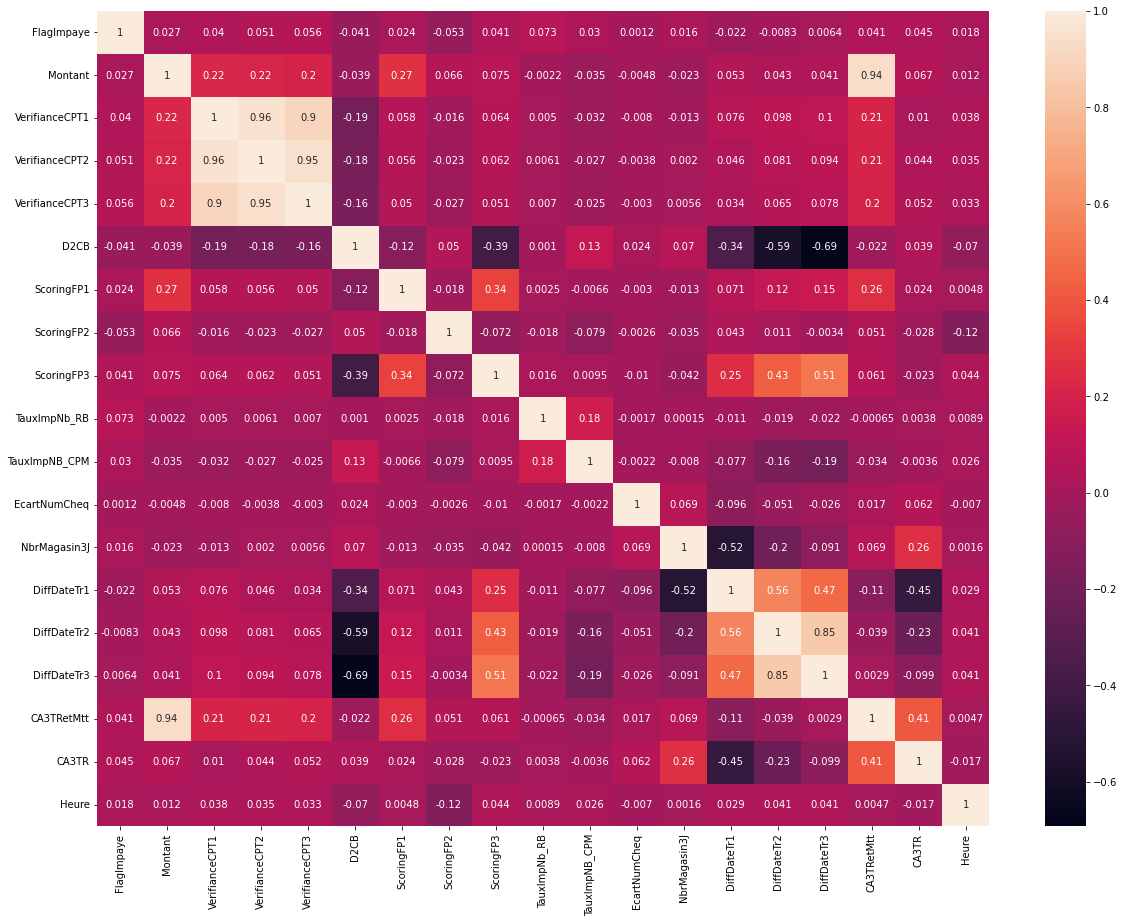

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_df = df_new.corr(method='pearson')
plt.figure(figsize=(20, 15))
sns.heatmap(corr_df, annot=True)
plt.show()

Bien évidemment, les *VerifianceCPT* sont corrélées entre elles, tout comme les *DiffDateTr* entre elles.
On remarque notamment que le montant est fortement corrélé avec la variable *CA3TRetMtt*, toutefois cette variable est un champ calculé, puisqu'il s'agit du montant des trois dernières transactions + le montant de la transaction en cours. Il est donc normal qu'elles soient corrélées, cepedant il est possible que cela cache une autre information. Nous avons donc recalculé la matrice des corrélations, cette fois-ci sans la variable *CA3TRetMtt*.

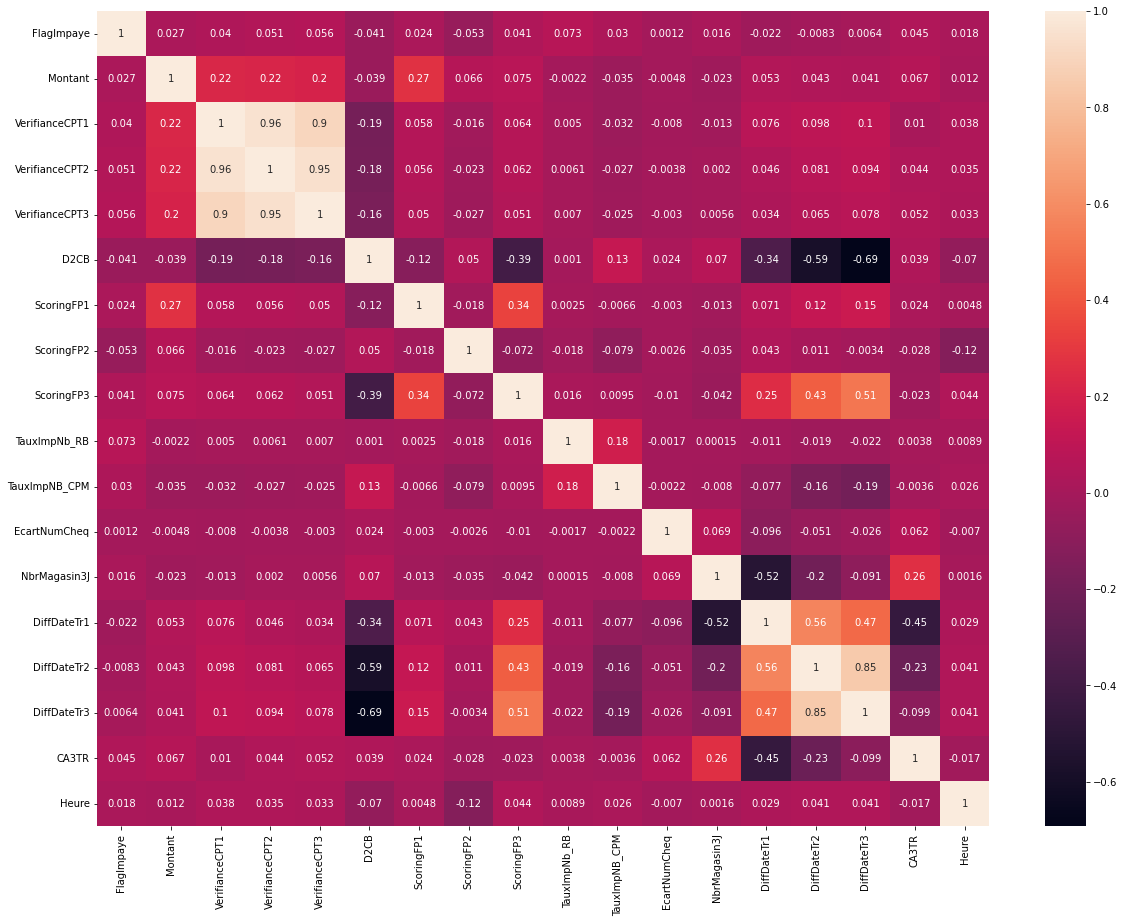

In [16]:
corr_df = df_new.loc[:, df.columns !='CA3TRetMtt'].corr(method='pearson')
plt.figure(figsize=(20, 15))
sns.heatmap(corr_df, annot=True)
plt.show()

On peut remarquer une légère corrélation négative entre la variable *D2CB* et les *DiffDateTr* mais cela ne nous permet pas de tirer de conclusions.

## 3.5. Etude du code de décision

Dans le jeu de données, une variable a attiré notre attention, il s'agit de la variable *CodeDecision*, qui indique si la transaction est acceptée, si le client fait partie d'une liste blanche ou noire ou si le client a déjà été arrêté pour une certaine raison. On peut donc supposer que cette variable influence notre variable d'intérêt. Regardons la répartition des types de transactions en fonction du code de décision.

In [17]:
pd.crosstab(df_new["FlagImpaye"],df_new['CodeDecision'])

CodeDecision,0,1,2,3,4
FlagImpaye,,,,,
0,3492870,1121343,704,1860,1
1,9916,283,18858,938,0


D'après les informations dont nous disposons, l'observation correspondant à un *CodeDecision* égal à 4 est une erreur. Voyons plus en détail cette transaction.

In [18]:
df_new.loc[df_new['CodeDecision']=='4',:]

,ZIBZIN,IDAvisAutorisationCheque,FlagImpaye,Montant,DateTransaction,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,...,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure
4009532,A013010041908018598931129,83408970,0,14.63,2017-09-14 17:26:10,4,0,0,0,1,...,45.368313,52.076034,0,1,5.0,5.0,5.0,14.63,0.0,62770


Nous avons décidé de la supprimer, étant donné qu'il n'y en a qu'une, et qu'elle correspond à une transaction considérée comme acceptée, faisant donc partie de la classe majoritaire.

In [19]:
# On récupère l'index de colonne où il y a la valeur 4
indexNames = df_new[ df_new['CodeDecision'] == '4' ].index
# On supprime les lignes en fonction de l'index
df_new.drop(indexNames , inplace=True)
df_new.shape

(4646772, 23)

Nous avons bien à nouveau une transaction en moins dans notre jeu de données. 
Nous pouvons passer à la partie suivante, qui consiste à préparer nos échantillons pour réaliser nos modèles.

# 4. Séparation en échantillon d'apprentissage et de test

Les ensembles sont définis de la manière suivante :

   • Apprentissage : transactions ayant eu lieu entre le "2017-02-01" et le "2017-08-31".

   • Test : transactions ayant eu lieu entre le "2017-09-01" et le "2017-11-30"

In [20]:
mask_train = (df_new['DateTransaction'] > '2017-02-01') & (df_new['DateTransaction'] <= '2017-08-31')
data_train = df_new.loc[mask_train]
print(data_train.shape)


mask_test = (df_new['DateTransaction'] > '2017-09-01') & (df_new['DateTransaction'] <= '2017-11-30')
data_test = df_new.loc[mask_test]
print(data_test.shape)

(3888468, 23)
(737067, 23)


Ainsi, notre base d'apprentissage est composée des 7 premiers mois de l'ensemble des transactions, ce qui correspond à plus de 3.8 millions de transactions et la base de test contient les 3 derniers mois, soit environ 700 000 transactions.

Une fois la base divisée en échantillons d'apprentissage et de test, nous allons séparer les variables explicatives de la variable cible.
Parmi les variables présentes dans le jeu de données, nous allons garder comme variables explicatives celles qui nous paraissent les plus pertinentes au vu des analyses exploratoires que nous avons réalisées. Ainsi, nous avons décidé d'enlever la variable *CA3TRetMtt*, ainsi que les variables d'identifiants telles que *ZIBZIN*, *IDAvisAutorisAtionCheque*, et les variables de date *DateTransaction* et *Heure* ces dernières n'étant pas porteuses d'informations pour répondre au problème.

In [21]:
X_train = data_train.drop(['CA3TRetMtt','ZIBZIN','IDAvisAutorisationCheque','DateTransaction', 'Heure', 'FlagImpaye'], axis= 1)
y_train = data_train['FlagImpaye']
print(X_train.shape)
print(y_train.shape)

X_test = data_test.drop(['CA3TRetMtt','ZIBZIN','IDAvisAutorisationCheque','DateTransaction', 'Heure', 'FlagImpaye'], axis= 1)
y_test = data_test['FlagImpaye']
print(X_test.shape)
print(y_test.shape)

(3888468, 17)
(3888468,)
(737067, 17)
(737067,)


De ce fait, nous disposons de 17 variables utilisées pour prédire la variable *FlagImpaye*.

Voyons également la répartition de la variable cible dans l'échantillon d'apprentissage.

In [22]:
y_train.value_counts()

0    3865122
1      23346
Name: FlagImpaye, dtype: int64

Par ailleurs, nous avons pu voir que les données étaient sur des échelles de mesures différentes. Nous préparons donc des échantillons avec des données centrées réduites, permettant peut-être d'obtenir un modèle plus performant. Nous utilisons uniquement les moyennes et écarts-types calculés sur l'échantillon d'apprentissage pour normaliser les deux échantillons. Pour cela, nous utilisons l'outil **StandardScaler** de la librairie **sklearn**.

In [23]:
from sklearn.preprocessing import StandardScaler

# instanciation
sc = StandardScaler()

# centrage et réduction
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

Tout d'abord, nous instancions l'objet. Puis nous l'utilisons pour calculer les moyennes et écarts-types sur l'échantillon d'apprentissage avec la fonction **fit_transform** et standardiser ce même échantillon. Enfin, nous transformons l'échantillon de test avec les mêmes paramètres calculés sur l'échantillon d'entraînement. 

Nous vérifions que les étapes ont bien été réalisées :

In [24]:
print(X_train_sc.mean(axis = 0))
print(X_train_sc.std(axis = 0))

print(X_test_sc.mean(axis = 0))
print(X_test_sc.std(axis = 0))

[ 2.21338122e-16 -2.67342420e-16  6.15144850e-17 -1.77760489e-17
 -1.14959579e-16 -4.47909653e-17  3.70431809e-17  1.07007137e-16
 -3.06987687e-18 -3.79115175e-16  1.29197961e-16  8.45495254e-18
 -4.05806658e-16 -2.26264544e-16  5.23364303e-15  5.97602697e-15
 -1.67560458e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[ 0.02576936 -0.60448008 -0.58291466 -0.55336064 -0.52210469 -0.36886018
  0.04459642 -0.1993414   0.14509408  0.01146861  0.02474132 -0.01370762
 -0.01863659  0.09959331  0.1544931   0.17976929 -0.01330012]
[1.37073317e+00 3.72074004e-01 1.22124533e-15 6.66133815e-16
 1.11022302e-15 9.57476483e-01 1.61422041e+00 9.30702519e-01
 1.32341284e+00 9.51584872e-01 1.02461367e+00 8.17391637e-01
 9.53533065e-01 1.00150920e+00 1.06461407e+00 1.10890390e+00
 1.42052096e+00]


Les moyennes de l'échantillon d'apprentissage valent bien 0 à l'arrondi. Les écarts-types valent bien 1. Il est normal que ce ne soit pas le cas pour l'échantillon de test.

Le travail préparatoire étant réalisé, nous pouvons passer au protocole expérimental.

# 5. Protocole expérimental

Dans un premier temps, nous avons choisi de réalisé un ré-échantillonage des données puisque nous avons vu qu'il y avait peu de transactions frauduleuses comparées aux transactions normales.

Ensuite, pour prédire la variable *FlagImpaye*, nous avons appliqué divers algorithmes supervisés, ainsi que des algorithmes non supervisés. Nous testerons sur les données brutes mais également sur les données normalisées.

Pour évaluer la performance des modèles, nous avons utilisé la F-mesure ainsi que l'aire sous la courbe ROC (AUC). Le choix de ces métriques d'évaluation plutôt que d'autres (accuracy, précision, rappel) s'explique par le fait notament que la définiton même de la F-mesure, F = 2TP / (2TP + FN + FP), consiste à maximiser la prédiction des fraudes tout en minimisant les erreurs.

## 5.1. Ré-échantillonnage

Pour traiter des données déséquilibrées, une des techniques possible consiste à réaliser un ré-échantillonnage. Cette technique permet d'obtenir un jeu de données équilibré en retirant des échantillons de la classe majoritaire (under-sampling) ou à rajouter des individus de la classe minoritaire (over-sampling). Il est également possible de réaliser un over-sampling suivi d'un under-sampling. 

Parmi les méthodes d'over-sampling, la plus simple consiste à dupliquer des observations de la classe minoritaire choisies de manière aléatoire. Il existe également une autre méthode assez courante d'over-sampling : **SMOTE (Synthetic Minority Oversampling Technique)**, basée sur les plus proches voisins. Ainsi, il s'agit de créer de nouveaux individus en combinant les individus de la classe minoritaires avec leurs plus proches voisins. L'algorithme peut se décomposer en 4 étapes :


*   Choisir un vecteur caractéristique de la classe minoritaire, appelé vc
*   Sélectionner ses k plus proches voisins et choisir l'un deux au hasard, appelé pv
*   Calculer la différence pour chaque valeur caractéristique i, vc[i]-pv[i], puis la  multiplier par un nombre aléatoire compris entre 0 et 1
*   Répéter ces opérations pour chaque point de la classe minoritaire


De nombreux variants de SMOTE on vu le jour tels que **BorderlineSMOTE**, **SVMSMOTE**, **KmeansSMOTE**, **SMOTENC** et **ADASYN (Adaptive Synthetic)**.


Pour les méthodes d'under-sampling, elles peuvent être divisées en 2 parties. Tout d'abord, les techniques de sous-échantillonnage contrôlé (le nombre d'observations est spécifié par l'utilisateur), dont la méthode aléatoire, puis les techniques de sous-échantillonage de nettoyage. Cependant, nous avons vu que plus de 99% des données faisaient partie de la classe majoritaire, ainsi, un under-sampling amènerait à supprimer beaucoup de données, et donc à une perte d'informations. C'est pour cette raison que nous avons choisi de ne pas réaliser d'under-sampling.


Concernant les techniques aléatoires, bien qu'elles permettent d'obtenir un jeu de données équilibré, le fait de duplier des observations de la classe minoritaire, pourrait entraîner un surapprentissage, étant donné que la classe minoritaire comporte peu d'observations. Et le fait de supprimer des observations de la classe majoritaire pourrait entraîner une perte d'informations. De ce fait, nous avons décidé de ne pas utiliser ces algorithmes pour équilibré le jeu de données.  

Ainsi, nous avons créé un échantillon d'apprentissage sur-échantillonné avec la méthode **SMOTE**.

Afin d'appliquer ces techniques, nous utilisons la librairie **imbalanced-learn**. Pour l'installer à partir d'Anaconda, la commande est la suivante : conda install -c conda-forge imbalanced-learn. Puis nous l'importons et nous vérifions sa version. Nous utilisons la 0.8.1.

In [25]:
import imblearn
print(imblearn.__version__)

0.8.1


### 5.1.1. Sur-échantillonnage avec SMOTE

Pour l'over-sampling, nous avons choisi la méthode **SMOTE**. Lors de l'appel à la fonction, nous devons préciser l'argument *sampling_strategy* pour spécifier quel type d'échantillonage nous voulons. Avec *minority* il s'agit de rééchantillonner uniquement la classe minoritaire. L'argument *n_jobs* correspond au nombre de coeurs utilisé pendant la validation croisée, -1 signifie tous.

In [26]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority', random_state = 1, n_jobs = -1)

In [27]:
X_train_sc_smote, y_train_smote = smote.fit_resample(X_train_sc, y_train)

In [28]:
y_train_smote.value_counts()

0    3865122
1    3865122
Name: FlagImpaye, dtype: int64

## 5.2. Algorithmes supervisés

### 5.2.1. Régression logistique

La régression logistique est une technique prédictive. Elle vise à construire un modèle permettant de prédire / expliquer les valeurs prises par une variable cible qualitative (le plus souvent binaire, on parle alors de régression logistique binaire ; si elle possède plus de 2 modalités, on parle de régression logistique polytomique) à partir d’un ensemble de variables explicatives quantitatives ou qualitatives (un codage est nécessaire dans ce cas). Le principe du modèle de la régression logistique est d'expliquer la survenance ou non d'un événement (la variable dépendante notée Y) par le niveau de variables explicatives (notées X).

#### 5.2.1.1. Sur les données brutes

Lorsque les données sur lesquelles nous travaillons sont déséquilibrées, nous évaluons la performance des modèles à l'aide du score de précision équilibré et de la courbe rappel-précision.

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn import metrics

/Users/learegazzetti/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[730419    163]
 [  6468     17]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    730582
           1       0.09      0.00      0.01      6485

    accuracy                           0.99    737067
   macro avg       0.54      0.50      0.50    737067
weighted avg       0.98      0.99      0.99    737067

Balanced accuracy score :  0.5011991621419931


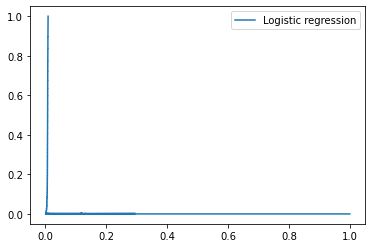

In [30]:
#Instanciation de la régression logistique avec les paramètres par défaut
reglog = LogisticRegression(random_state=1)

#Modélisation
reglog.fit(X_train,y_train)

#Prédiction en test
y_pred_reglog = reglog.predict(X_test)
conf_mat_reglog = confusion_matrix(y_test, y_pred_reglog)
print(conf_mat_reglog)

print(metrics.classification_report(y_test, y_pred_reglog))

#Performances en test
accuracy_reglog = balanced_accuracy_score(y_test,y_pred_reglog)
print("Balanced accuracy score : ", accuracy_reglog)

y_pred_reglog_proba = reglog.predict_proba(X_test)[::,1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_reglog_proba)
plt.plot(precision, recall,label="Logistic regression")
plt.legend()
plt.show()

Nous pouvons voir que sur les données brutes et déséquilibrées, les résultats ne sont pas bons. Mais cela n'est pas étonnant, de ce fait, nous avons choisi de mettre de côté cette piste d'analyse.

#### 5.2.1.2. Sur les données brutes avec l'option class_weight='balanced'

En lisant la documentation relative à l'implémentation de la régression logistique sous **sklearn**, nous avons remarqué que l'argument *class_weight*, par défaut initialiser à None, donnant alors des poids égaux pour toutes les classes. En mettant ce paramètre à “balanced”, nous pouvons demander de calculer automatiquement les poids pour chaque classe. Ces poids sont calculés comme étant inversement proportionnels à la fréquence de la classe minoritaire. 

In [31]:
from sklearn.metrics import f1_score

/Users/learegazzetti/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[387084 343498]
 [  1971   4514]]
              precision    recall  f1-score   support

           0       0.99      0.53      0.69    730582
           1       0.01      0.70      0.03      6485

    accuracy                           0.53    737067
   macro avg       0.50      0.61      0.36    737067
weighted avg       0.99      0.53      0.69    737067

F1 score :  0.025467070243189647


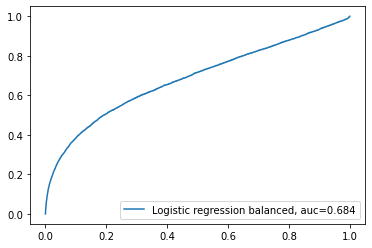

In [32]:
#Instanciation de la régression logistique avec les paramètres par défaut
reglog_balanced = LogisticRegression(class_weight='balanced', random_state=1)
#Modélisation
reglog_balanced.fit(X_train,y_train)

#Prédiction en test
y_pred_reglog_balanced = reglog_balanced.predict(X_test)
conf_mat_reglog_balanced = confusion_matrix(y_test, y_pred_reglog_balanced)
print(conf_mat_reglog_balanced)

print(metrics.classification_report(y_test, y_pred_reglog_balanced))

#Performances en test
f1score_reglog_balanced = f1_score(y_test,y_pred_reglog_balanced)
print("F1 score : ", f1score_reglog_balanced)

y_pred_reglog_balanced_proba = reglog_balanced.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_reglog_balanced_proba)
auc_reglog_balanced = metrics.roc_auc_score(y_test, y_pred_reglog_balanced_proba)
plt.plot(fpr,tpr,label="Logistic regression balanced, auc="+str(round(auc_reglog_balanced,3)))
plt.legend(loc=4)
plt.show()

Un message d'erreur nous indique que l'algorithme ne converge pas, cela est dû au fait que nous travaillons sur les données brutes, et non sur les données standardisées. De ce fait, nous décidons de laisser les données brutes de côté pour le reste des analyses.

#### 5.2.1.3. Sur les données standardisées en modifiant le seuil

Dans la classification binaire, la valeur de probabilité par défaut à laquelle une prédiction est classée comme « 1 » ou « 0 » est de 0,50. Cela signifie qu'avec une estimation de >= 0,50, l'observation est placée dans la classe « 1 » tandis que les valeurs inférieures se voient attribuer la classe « 0 ». Pour atteindre de meilleures performances en classification binaire, il peut être utile d'optimiser également le seuil de probabilité auquel cette division est effectuée. Cela peut être particulièrement utile si la réponse est déséquilibrée. 

In [33]:
from numpy import argmax

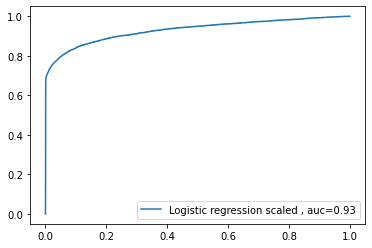

Best Threshold = 0.004381


In [34]:
#Instanciation de la régression logistique
reglog_sc = LogisticRegression(random_state=1)

#Modélisation
reglog_sc.fit(X_train_sc,y_train)

y_pred_reglog_sc_proba = reglog_sc.predict_proba(X_test_sc)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_reglog_sc_proba)
auc_reglog_sc = metrics.roc_auc_score(y_test, y_pred_reglog_sc_proba)
plt.plot(fpr,tpr,label="Logistic regression scaled , auc="+str(round(auc_reglog_sc,3)))
plt.legend(loc=4)
plt.show()

# seuil adéquat
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold = %f' % (best_thresh))

In [35]:
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

In [36]:
#Prédiction en test
y_pred_reglog_sc_seuil = to_labels(y_pred_reglog_sc_proba, best_thresh)
conf_mat_reglog_sc_seuil = confusion_matrix(y_test, y_pred_reglog_sc_seuil)
print(conf_mat_reglog_sc_seuil)

[[688539  42043]
 [  1264   5221]]


In [37]:
print(metrics.classification_report(y_test, y_pred_reglog_sc_seuil))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    730582
           1       0.11      0.81      0.19      6485

    accuracy                           0.94    737067
   macro avg       0.55      0.87      0.58    737067
weighted avg       0.99      0.94      0.96    737067



In [38]:
f1score_reglog_sc_seuil = f1_score(y_test, y_pred_reglog_sc_seuil)
print("F1 score : ", f1score_reglog_sc_seuil)

F1 score :  0.19427338183035964


#### 5.2.1.4. Sur les données standardisées avec l'option class_weight='balanced'

[[689764  40818]
 [  1218   5267]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    730582
           1       0.11      0.81      0.20      6485

    accuracy                           0.94    737067
   macro avg       0.56      0.88      0.59    737067
weighted avg       0.99      0.94      0.96    737067

F1 score :  0.2003804451207913


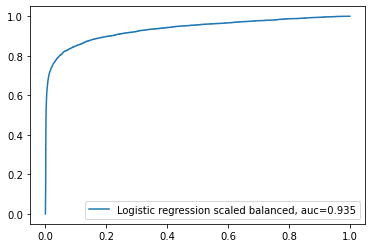

In [39]:
#Instanciation de la régression logistique avec les paramètres par défaut
reglog_sc_balanced = LogisticRegression(random_state=1, class_weight='balanced')
#Modélisation
reglog_sc_balanced.fit(X_train_sc,y_train)

#Prédiction en test
y_pred_reglog_sc_balanced = reglog_sc_balanced.predict(X_test_sc)
conf_mat_reglog_sc_balanced = confusion_matrix(y_test, y_pred_reglog_sc_balanced)
print(conf_mat_reglog_sc_balanced)

print(metrics.classification_report(y_test, y_pred_reglog_sc_balanced))

#Performances en test
f1score_reglog_sc_balanced = f1_score(y_test,y_pred_reglog_sc_balanced)
print("F1 score : ", f1score_reglog_sc_balanced)

y_pred_reglog_sc_balanced_proba = reglog_sc_balanced.predict_proba(X_test_sc)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_reglog_sc_balanced_proba)
auc_reglog_sc_balanced = metrics.roc_auc_score(y_test, y_pred_reglog_sc_balanced_proba)
plt.plot(fpr,tpr,label="Logistic regression scaled balanced, auc="+str(round(auc_reglog_sc_balanced,3)))
plt.legend(loc=4)
plt.show()

#### 5.2.1.5. Sur les données standardisées et sur-échantillonées

[[688962  41620]
 [  1214   5271]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    730582
           1       0.11      0.81      0.20      6485

    accuracy                           0.94    737067
   macro avg       0.56      0.88      0.58    737067
weighted avg       0.99      0.94      0.96    737067

F1 score :  0.1975044964028777


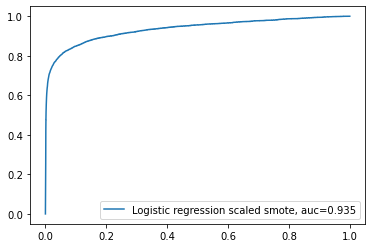

In [40]:
#Instanciation de la régression logistique avec les paramètres par défaut
reglog_sc_smote = LogisticRegression(random_state=1)
#Modélisation
reglog_sc_smote.fit(X_train_sc_smote,y_train_smote)

#Prédiction en test
y_pred_reglog_sc_smote = reglog_sc_smote.predict(X_test_sc)
conf_mat_reglog_sc_smote = confusion_matrix(y_test, y_pred_reglog_sc_smote)
print(conf_mat_reglog_sc_smote)

print(metrics.classification_report(y_test, y_pred_reglog_sc_smote))

#Performances en test
f1score_reglog_sc_smote = f1_score(y_test,y_pred_reglog_sc_smote)
print("F1 score : ", f1score_reglog_sc_smote)

y_pred_reglog_sc_smote_proba = reglog_sc_smote.predict_proba(X_test_sc)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_reglog_sc_smote_proba)
auc_reglog_sc_smote = metrics.roc_auc_score(y_test, y_pred_reglog_sc_smote_proba)
plt.plot(fpr,tpr,label="Logistic regression scaled smote, auc="+str(round(auc_reglog_sc_smote,3)))
plt.legend(loc=4)
plt.show()

### 5.2.2. Analyse discriminante linéaire

L'analyse discriminante crée un modèle de prévision de groupe d'affectation. Le modèle est composé d'une fonction discriminante (ou, pour plus de deux groupes, un ensemble de fonctions discriminantes) basée sur les combinaisons linéaires des variables de prédicteur qui donnent la meilleure discrimination entre groupes. L'enjeu est d'essayé de trouver un axe (ou un ensemble d'axe) qui résument au mieux la distance existante entre deux groupes. La droite est une combinaison linéaire des variables explicatives (continue).

#### 5.2.2.1. Sur les données standardisées en modifiant le seuil 

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

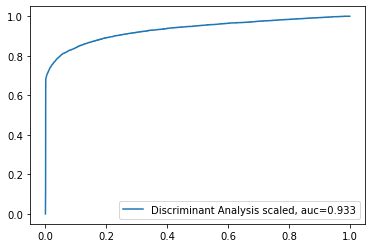

Best Threshold = 0.000010


In [42]:
#Importation de l'analyse discriminante linéaire
lda = LinearDiscriminantAnalysis(solver="eigen")

#Instanciation
lda.fit(X_train_sc,y_train)


y_pred_lda_proba = lda.predict_proba(X_test_sc)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_lda_proba)
auc_lda = metrics.roc_auc_score(y_test, y_pred_lda_proba)
plt.plot(fpr,tpr,label="Discriminant Analysis scaled, auc="+str(round(auc_lda,3)))
plt.legend(loc=4)
plt.show()

# seuil adéquat
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold = %f' % (best_thresh))

In [43]:
#Prédiction en test
y_pred_lda = to_labels(y_pred_lda_proba, best_thresh)
conf_mat_lda = confusion_matrix(y_test, y_pred_lda)
print(conf_mat_lda)

[[688628  41954]
 [  1226   5259]]


In [44]:
print(metrics.classification_report(y_test, y_pred_lda))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    730582
           1       0.11      0.81      0.20      6485

    accuracy                           0.94    737067
   macro avg       0.55      0.88      0.58    737067
weighted avg       0.99      0.94      0.96    737067



In [45]:
f1score_lda = f1_score(y_test, y_pred_lda)
print("F1 score : ", f1score_lda)

F1 score :  0.19587321687958584


#### 5.2.2.3. Sur les données standardisées et sur-échantillonées¶

[[688962  41620]
 [  1214   5271]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    730582
           1       0.19      0.76      0.31      6485

    accuracy                           0.97    737067
   macro avg       0.60      0.87      0.65    737067
weighted avg       0.99      0.97      0.98    737067

F1 score :  0.30821063139505867


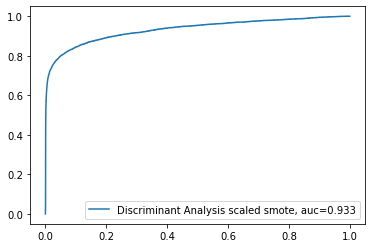

In [46]:
#Importation de l'analyse discriminante linéaire
lda_smote = LinearDiscriminantAnalysis(solver="eigen")

#Instanciation
lda_smote.fit(X_train_sc_smote,y_train_smote)

#Prédiction en test
y_pred_lda_smote = lda_smote.predict(X_test_sc)
conf_mat_lda_smote = confusion_matrix(y_test, y_pred_lda_smote)
print(conf_mat_reglog_sc_smote)

print(metrics.classification_report(y_test, y_pred_lda_smote))

#Performances en test
f1score_lda_smote = f1_score(y_test,y_pred_lda_smote)
print("F1 score : ", f1score_lda_smote)

y_pred_lda_smote_proba = lda_smote.predict_proba(X_test_sc)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_lda_smote_proba)
auc_lda_smote = metrics.roc_auc_score(y_test, y_pred_lda_smote_proba)
plt.plot(fpr,tpr,label="Discriminant Analysis scaled smote, auc="+str(round(auc_lda_smote,3)))
plt.legend(loc=4)
plt.show()

### 5.2.3. Arbre de décision suivi de random forest pour de l'optimisation

Les arbres de décision sont une catégorie d’arbres utilisée dans l’exploration de données. Ils emploient une représentation hiérarchique de la structure des données sous forme des séquences de décisions en vue de la prédiction d’un résultat ou d’une classe. Les arbres de classification permettent de prédire à quelle classe la variable cible appartient.

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

#### 5.2.3.1. Sur les données standardisées

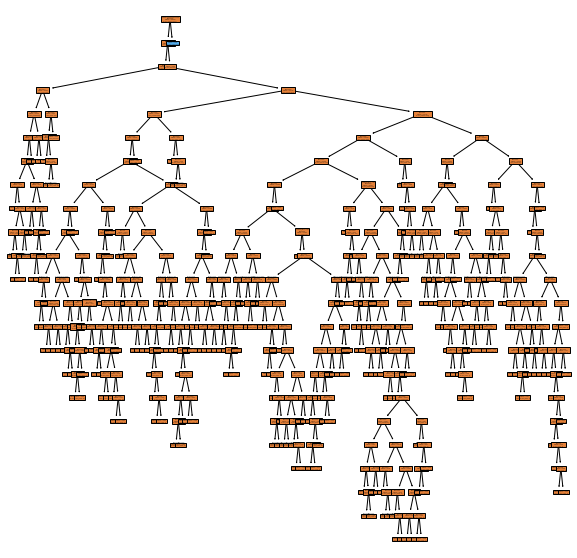

In [48]:
#instanciation de l'arbre
arbre = DecisionTreeClassifier(min_samples_split=10000,min_samples_leaf=10000, random_state = 1)

#construction de l'arbre
arbre.fit(X = X_train_sc , y = y_train)

#affichage de l'arbre
#plot_tree(arbre,feature_names = list(df_new.columns[:-1]),filled=True)

#affichage sous forme graphique
plt.figure(figsize=(10,10))
plot_tree(arbre,feature_names = list(df_new.columns[:-1]),filled=True)
plt.show()

[[730057    525]
 [  2073   4412]]
F1 score :  0.7725442129224305
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    730582
           1       0.89      0.68      0.77      6485

    accuracy                           1.00    737067
   macro avg       0.95      0.84      0.89    737067
weighted avg       1.00      1.00      1.00    737067



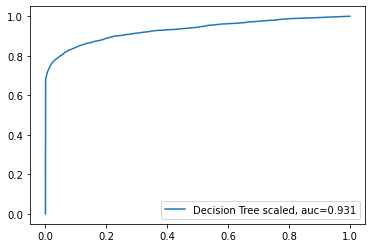

In [49]:
#prédiction sur l'échantillon de test
arbre_pred = arbre.predict(X=X_test_sc)

#matrice de confusion
print(metrics.confusion_matrix(y_test,arbre_pred))

#Performances en test
f1score_arbre = f1_score(y_test,arbre_pred)
print("F1 score : ", f1score_arbre)

print(metrics.classification_report(y_test, arbre_pred))

y_pred_arbre_proba = arbre.predict_proba(X_test_sc)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_arbre_proba)
auc_arbre = metrics.roc_auc_score(y_test, y_pred_arbre_proba)
plt.plot(fpr,tpr,label="Decision Tree scaled, auc="+str(round(auc_arbre,3)))
plt.legend(loc=4)
plt.show()

#### 5.2.3.2. Sur les données standardisées avec l'option balanced

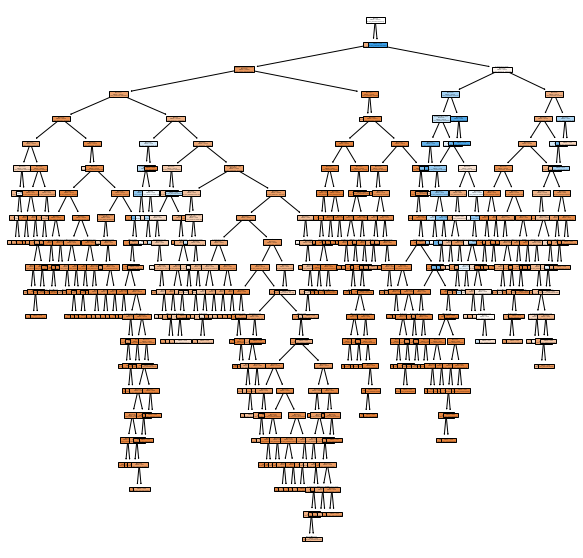

In [50]:
#instanciation de l'arbre
arbre_balanced = DecisionTreeClassifier(min_samples_split=10000,min_samples_leaf=10000, random_state = 1, class_weight = 'balanced')

#construction de l'arbre
arbre_balanced.fit(X = X_train_sc , y = y_train)

#affichage de l'arbre
#plot_tree(arbre_balanced,feature_names = list(df_new.columns[:-1]),filled=True)

#affichage sous forme graphique
plt.figure(figsize=(10,10))
plot_tree(arbre_balanced,feature_names = list(df_new.columns[:-1]),filled=True)
plt.show()

[[658792  71790]
 [  1079   5406]]
F1 score :  0.12920495691973088
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    730582
           1       0.07      0.83      0.13      6485

    accuracy                           0.90    737067
   macro avg       0.53      0.87      0.54    737067
weighted avg       0.99      0.90      0.94    737067



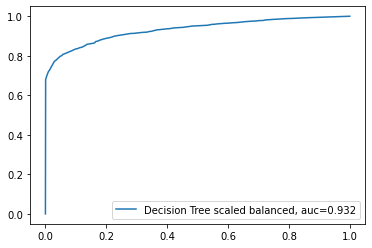

In [51]:
#prédiction sur l'échantillon de test
arbre_pred_balanced = arbre_balanced.predict(X=X_test_sc)

#matrice de confusion
print(metrics.confusion_matrix(y_test,arbre_pred_balanced))

#Performances en test
f1score_arbre_balanced = f1_score(y_test,arbre_pred_balanced)
print("F1 score : ", f1score_arbre_balanced)

print(metrics.classification_report(y_test, arbre_pred_balanced))

y_pred_arbre_proba_balanced = arbre_balanced.predict_proba(X_test_sc)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_arbre_proba_balanced)
auc_arbre_balanced = metrics.roc_auc_score(y_test, y_pred_arbre_proba_balanced)
plt.plot(fpr,tpr,label="Decision Tree scaled balanced, auc="+str(round(auc_arbre_balanced,3)))
plt.legend(loc=4)
plt.show()

#### 5.2.3.3. Sur les données standardisées et sur-échantillonées

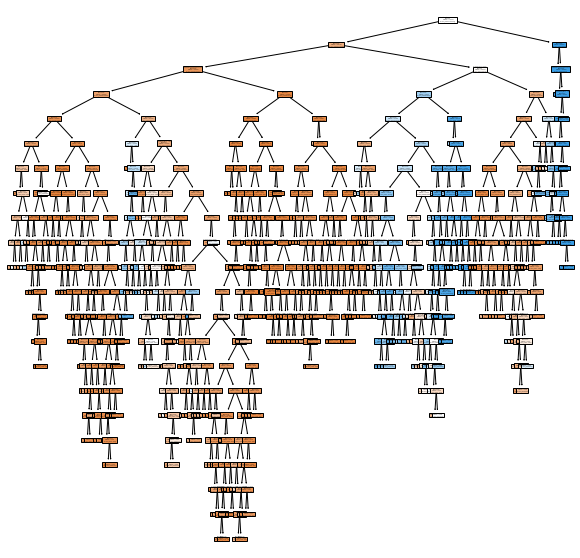

In [52]:
#instanciation de l'arbre
arbre_smote = DecisionTreeClassifier(min_samples_split=10000,min_samples_leaf=10000)

#construction de l'arbre
arbre_smote.fit(X = X_train_sc_smote , y = y_train_smote)

#affichage de l'arbre
#plot_tree(arbre_smote,feature_names = list(df_new.columns[:-1]),filled=True)

#affichage sous forme graphique
plt.figure(figsize=(10,10))
plot_tree(arbre_smote,feature_names = list(df_new.columns[:-1]),filled=True)
plt.show()

[[665273  65309]
 [  1133   5352]]
F1 score :  0.13874990278173852
              precision    recall  f1-score   support

           0       1.00      0.91      0.95    730582
           1       0.08      0.83      0.14      6485

    accuracy                           0.91    737067
   macro avg       0.54      0.87      0.55    737067
weighted avg       0.99      0.91      0.95    737067



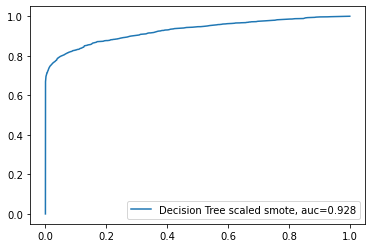

In [53]:
#prédiction sur l'échantillon de test
arbre_pred_smote = arbre_smote.predict(X=X_test_sc)

#matrice de confusion
print(metrics.confusion_matrix(y_test,arbre_pred_smote))

#Performances en test
f1score_arbre_smote = f1_score(y_test,arbre_pred_smote)
print("F1 score : ", f1score_arbre_smote)

print(metrics.classification_report(y_test, arbre_pred_smote))

y_pred_arbre_smote_proba = arbre_smote.predict_proba(X_test_sc)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_arbre_smote_proba)
auc_arbre_smote = metrics.roc_auc_score(y_test, y_pred_arbre_smote_proba)
plt.plot(fpr,tpr,label="Decision Tree scaled smote, auc="+str(round(auc_arbre_smote,3)))
plt.legend(loc=4)
plt.show()

### 5.2.4. Random forest

Le random forest est composé de plusieurs arbres de décision. Chacun produit une estimation, et c'est l'assemblage des arbres de décision et de leurs analyses, qui va donner une estimation globale. Il s'agit de s'inspirer de différents avis, traitant un même problème, pour mieux l'appréhender. Chaque modèle est distribué de façon aléatoire aux sous-ensembles d'arbres décisionnels. Le random forest est un modèle d'apprentissage, dont l'efficacité dépend fortement de la qualité de l'échantillon de données de départ. Un random forest fonctionne sur le principe du bagging. La première étape consiste à découper un dataset en sous-ensembles (arbres de décision), puis de proposer un modèle d'entraînement à chacun de ses groupes. Enfin, on combine les résultats de ces arbres afin d'obtenir la prévision la plus solide.

#### 5.2.4.1. Sur les données standardisées

In [54]:
#classe RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [55]:
#instanciation
random_forest = RandomForestClassifier(n_estimators=20)

#apprentissage
random_forest.fit(X_train_sc,y_train)

RandomForestClassifier(n_estimators=20)

[[730491     91]
 [  2170   4315]]
F1 score :  0.7923973923423011
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    730582
           1       0.98      0.67      0.79      6485

    accuracy                           1.00    737067
   macro avg       0.99      0.83      0.90    737067
weighted avg       1.00      1.00      1.00    737067



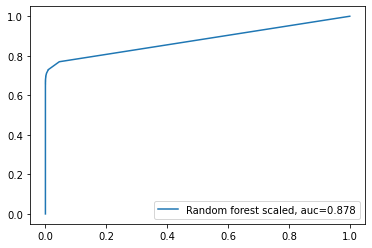

In [56]:
#prediction
y_pred_random_forest = random_forest.predict(X_test_sc)

#matrice de confusion
print(metrics.confusion_matrix(y_test,y_pred_random_forest))

#Performances en test
f1score_random_forest = f1_score(y_test,y_pred_random_forest)
print("F1 score : ", f1score_random_forest)

print(metrics.classification_report(y_test, y_pred_random_forest))

y_pred_random_forest_proba = random_forest.predict_proba(X_test_sc)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_random_forest_proba)
auc_random_forest = metrics.roc_auc_score(y_test, y_pred_random_forest_proba)
plt.plot(fpr,tpr,label="Random forest scaled, auc="+str(round(auc_random_forest,3)))
plt.legend(loc=4)
plt.show()

#### 5.2.4.2. Sur les données standardisées et smotées

In [57]:
#instanciation
random_forest_smote = RandomForestClassifier(n_estimators=20)

#apprentissage
random_forest_smote.fit(X_train_sc_smote,y_train_smote)

RandomForestClassifier(n_estimators=20)

[[729345   1237]
 [  2045   4440]]
F1 score :  0.7301430685742477
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    730582
           1       0.78      0.68      0.73      6485

    accuracy                           1.00    737067
   macro avg       0.89      0.84      0.86    737067
weighted avg       1.00      1.00      1.00    737067



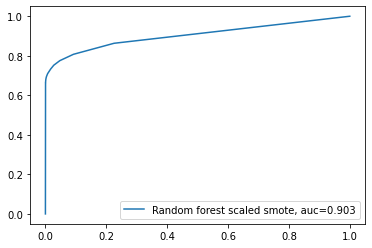

In [58]:
#prediction
y_pred_random_forest_smote = random_forest_smote.predict(X_test_sc)

#matrice de confusion
conf_mat_random_forest_smote = confusion_matrix(y_test,y_pred_random_forest_smote)
print(conf_mat_random_forest_smote)

#Performances en test
f1score_random_forest_smote = f1_score(y_test,y_pred_random_forest_smote)
print("F1 score : ", f1score_random_forest_smote)

print(metrics.classification_report(y_test, y_pred_random_forest_smote))

y_pred_random_forest_smote_proba = random_forest_smote.predict_proba(X_test_sc)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_random_forest_smote_proba)
auc_random_forest_smote = metrics.roc_auc_score(y_test, y_pred_random_forest_smote_proba)
plt.plot(fpr,tpr,label="Random forest scaled smote, auc="+str(round(auc_random_forest_smote,3)))
plt.legend(loc=4)
plt.show()

### 5.2.5. SVM

Le SVM appartient à la catégorie des classificateurs linéaires. Ils font partie de la famille des algorithmes d‘apprentissage automatique qui permettent de résoudre des problèmes tant de classification que de régression ou de détection d’anomalie.

#### 5.2.5.1. Sur les données standardisées et smotées

In [59]:
#from sklearn.svm import OneClassSVM

In [60]:
#Instanciation du SVM
#svm_sc_smote = OneClassSVM()
#Modélisation
#svm_sc_smote.fit(X_train_sc_smote,y_train_smote)

#Prédiction en test
#y_pred_svm_sc_smote = svm_sc_smote.predict(X_test_sc)
#conf_mat_svm_sc_smote = confusion_matrix(y_test, y_pred_svm_sc_smote)
#print(conf_mat_svm_sc_smote)

#Performances en test
#f1score_svm_sc_smote = f1_score(y_test,y_pred_svm_sc_smote)
#print("F1 score : ", f1score_svm_sc)

#y_pred_svm_sc_smote_proba = svm_sc_smote.predict_proba(X_test_sc)[::,1]
#fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_svm_sc_smote_proba)
#auc_svm_sc_smote = metrics.roc_auc_score(y_test, y_pred_svm_sc_smote_proba)
#plt.plot(fpr,tpr,label="SVM scaled smote, auc="+str(round(auc_svm_sc_smote,3)))
#plt.legend(loc=4)
#plt.show()

Les temps de calcul étant trop long, nous avons essayé d'utiliser la librairie h2o, permettant de réaliser les calculs en parallèles.

In [61]:
#initialisation de h2o
#import h2o
# Start H2O
#h2o.init()

# création des dataframe au format h2o pour la parallélisation
#train = data_train.drop(['CA3TRetMtt','ZIBZIN','IDAvisAutorisationCheque','DateTransaction', 'Heure'], axis= 1)
#test = data_test.drop(['CA3TRetMtt','ZIBZIN','IDAvisAutorisationCheque','DateTransaction', 'Heure'], axis= 1)

#train_h2o = h2o.H2OFrame(train, column_types={"FlagImpaye": "categorical"})
#test_h2o = h2o.H2OFrame(test, column_types={"FlagImpaye": "categorical"})

In [62]:
#from h2o.estimators import H2OSupportVectorMachineEstimator

# Création et entrainement du modèle
#svm_sc = H2OSupportVectorMachineEstimator(seed = 1)
#svm_sc.train(x=train_h2o.columns[:-1],y="FlagImpaye", training_frame=train_h2o)

#  Generate predictions on a validation set (if necessary):
#y_pred_svm_sc = svm_sc.predict(test_h2o).as_data_frame()

#conf_mat_svm_sc=pd.crosstab(test_h2o.as_data_frame()["FlagImpaye"],y_pred_svm_sc['predict'])
#print(conf_mat_svm_sc)

# Eval performance:
#svm_sc_perf = svm_sc.model_performance(test_h2o)
#print("F1 score : ", svm_sc_perf.F1())

# ROC curve
#fpr = out.fprs
#tpr = out.tprs
#plt.figure()
#plt.plot(fpr, tpr,label="SVM scaled, auc="+str(round(svm_sc_perf.auc(),3)))
#plt.legend(loc=4)
#plt.show()

#éteindre le moteur "h2o"
#h2o.cluster().shutdown()

A nouveau, les temps de calcul ne nous permettent pas d'explorer cette piste, que nous laissons donc de côté.
En effet, les SVM sont peu performant quand le jeu de données est composé de beaucoup de ligne. Le jeu de données présent comportant beaucoup d'obersation, l'utilisation d'un SVM semble déconseillé pour traiter la problématique de détection d'anomalie sans une puissante capacité de calcul.

### 5.2.6. K plus proches voisins

La méthode des k plus proches voisins est  un algorithme d’apprentissage supervisé qui permet à la fois de résoudre un problème de classification et de régression.

A partir des données d’entrée, on choisit une fonction de similarité entre observations et pn fixe une valeur pour k, nombre de plus proches voisins.

Pour une nouvelle observation que l'on veut prédire, il faut calculer toutes les distances entre cette observation en entrée et les autres observations du jeu de données, ne conserver que les k observations du jeu de données qui sont les plus « proches » de l’observation à prédire. L’algorithme assigne la valeur de la classe majoritaire à la nouvelle observation, pour un problème de classification.

In [63]:
from sklearn.neighbors import KNeighborsClassifier

##### 5.2.6.1. Sur les données standardisées et smotées

In [64]:
#Instanciation
#knn_sc_smote = KNeighborsClassifier(n_neighbors=5, n_jobs = -1, weights = 'distance')
#Modélisation
#knn_sc_smote.fit(X_train_sc_smote,y_train_smote)
#Prédiction en test
#y_pred_knn_sc_smote = knn_sc_smote.predict(X_test_sc)
#conf_mat_knn_sc_smote = confusion_matrix(y_test, y_pred_knn_sc_smote)
#print(conf_mat_knn_sc_smote)

#Performances en test
#f1score_knn_sc_smote = f1_score(y_test,y_pred_knn_sc_smote)
#print("F1 score : ", f1score_knn_sc_smote)

#y_pred_knn_sc_smote_proba = knn_sc_smote.predict_proba(X_test_sc)[::,1]
#fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_knn_sc_smote_proba)
#auc_knn_sc_smote = metrics.roc_auc_score(y_test, y_pred_knn_sc_smote_proba)
#plt.plot(fpr,tpr,label="Knn scaled smote, auc="+str(round(auc_knn_sc_smote,3)))
#plt.legend(loc=4)
#plt.show()

Pour cet algorithme, le choix du nombre k de plus proches voisins et de la fonction de similarité peuvent conduire à une forte variabilité des résultats. De plus, il est couteux en terme de complexité. De ce fait, sur une grande base de données, ce qui est notre cas, le temps de calcul est très long, c'est pourquoi nous avons mis de côté cette piste d'analyse.

### 5.2.7. Gradient Boosting

Combinaison du boosting et de la technique de descente de gradient. Le boosting est une technique ensembliste qui consiste à agréger des
classifieurs (modèles) élaborés séquentiellement sur un échantillon
d’apprentissage dont les poids des individus sont corrigés au fur et à mesure.
La descente du gradient est une technique itérative qui permet d’approcher la solution d’un problème d’optimisation. En apprentissage supervisé, la construction du modèle revient souvent à déterminer les paramètres (du modèle) qui permettent d’optimiser (max ou min) une fonction objectif.

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

#### 5.2.7.1. Sur les données standardisées en modifiant le seuil

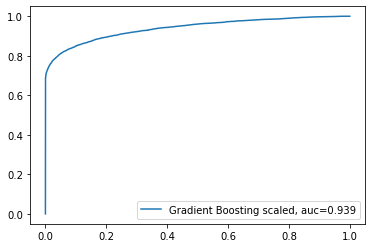

Best Threshold = 0.005805


In [66]:
#Instanciation
gb_sc = GradientBoostingClassifier(random_state=1)
#Modélisation
gb_sc.fit(X_train_sc,y_train)

y_pred_gb_sc_proba = gb_sc.predict_proba(X_test_sc)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_gb_sc_proba)
auc_gb_sc = metrics.roc_auc_score(y_test, y_pred_gb_sc_proba)
plt.plot(fpr,tpr,label="Gradient Boosting scaled, auc="+str(round(auc_gb_sc,3)))
plt.legend(loc=4)
plt.show()

# seuil adéquat
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold = %f' % (best_thresh))

In [67]:
#Prédiction en test
y_pred_gb_sc = to_labels(y_pred_gb_sc_proba, best_thresh)
conf_mat_gb_sc = confusion_matrix(y_test, y_pred_gb_sc)
print(conf_mat_gb_sc)

[[687591  42991]
 [  1164   5321]]


In [68]:
print(metrics.classification_report(y_test, y_pred_gb_sc))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    730582
           1       0.11      0.82      0.19      6485

    accuracy                           0.94    737067
   macro avg       0.55      0.88      0.58    737067
weighted avg       0.99      0.94      0.96    737067



In [69]:
#Performances en test
f1score_gb_sc = f1_score(y_test,y_pred_gb_sc)
print("F1 score : ", f1score_gb_sc)

F1 score :  0.19420771210102744


#### 5.2.7.2. Sur les données standardisées et smotées

[[680614  49968]
 [  1157   5328]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    730582
           1       0.10      0.82      0.17      6485

    accuracy                           0.93    737067
   macro avg       0.55      0.88      0.57    737067
weighted avg       0.99      0.93      0.96    737067

F1 score :  0.17248021236302424


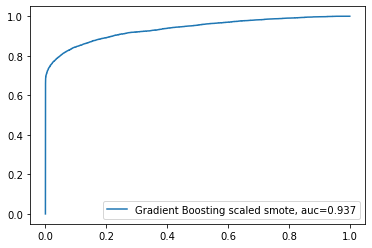

In [70]:
#Instanciation
gb_sc_smote = GradientBoostingClassifier(random_state=1)
#Modélisation
gb_sc_smote.fit(X_train_sc_smote,y_train_smote)
#Prédiction en test
y_pred_gb_sc_smote = gb_sc_smote.predict(X_test_sc)
conf_mat_gb_sc_smote = confusion_matrix(y_test, y_pred_gb_sc_smote)
print(conf_mat_gb_sc_smote)

print(metrics.classification_report(y_test, y_pred_gb_sc_smote))

#Performances en test
f1score_gb_sc_smote = f1_score(y_test,y_pred_gb_sc_smote)
print("F1 score : ", f1score_gb_sc_smote)

y_pred_gb_sc_smote_proba = gb_sc_smote.predict_proba(X_test_sc)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_gb_sc_smote_proba)
auc_gb_sc_smote = metrics.roc_auc_score(y_test, y_pred_gb_sc_smote_proba)
plt.plot(fpr,tpr,label="Gradient Boosting scaled smote, auc="+str(round(auc_gb_sc_smote,3)))
plt.legend(loc=4)
plt.show()

## 5.3. Algorithmes non supervisés

### 5.3.1. K-means

K-means est un algorithme non supervisé de clustering non hiérarchique. Il permet de regrouper en K clusters distincts les observations du data set. Ainsi les données similaires se retrouveront  dans un même cluster.

In [71]:
#initialisation de h2o
import h2o
# Start H2O
h2o.init()

# création des dataframe au format h2o pour la parallélisation
train = data_train.drop(['CA3TRetMtt','ZIBZIN','IDAvisAutorisationCheque','DateTransaction', 'Heure'], axis= 1)
test = data_test.drop(['CA3TRetMtt','ZIBZIN','IDAvisAutorisationCheque','DateTransaction', 'Heure'], axis= 1)

train_h2o = h2o.H2OFrame(train, column_types={"FlagImpaye": "categorical"})
test_h2o = h2o.H2OFrame(test, column_types={"FlagImpaye": "categorical"})

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "11" 2018-09-25; Java(TM) SE Runtime Environment 18.9 (build 11+28); Java HotSpot(TM) 64-Bit Server VM 18.9 (build 11+28, mixed mode)
  Starting server from /Users/learegazzetti/.local/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/mv/sjmp9nkn3ps2fjvtx4mk81s80000gn/T/tmpv12nhb88
  JVM stdout: /var/folders/mv/sjmp9nkn3ps2fjvtx4mk81s80000gn/T/tmpv12nhb88/h2o_learegazzetti_started_from_python.out
  JVM stderr: /var/folders/mv/sjmp9nkn3ps2fjvtx4mk81s80000gn/T/tmpv12nhb88/h2o_learegazzetti_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.7
H2O_cluster_version_age:,25 days
H2O_cluster_name:,H2O_from_python_learegazzetti_9gp68z
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [72]:
from h2o.estimators import H2OKMeansEstimator

# Création et entrainement du modèle
fraude_kmeans = H2OKMeansEstimator(k=2,estimate_k=True,standardize=True,seed=1234)
fraude_kmeans.train(x=train_h2o.columns[:-1],y="FlagImpaye",training_frame=train_h2o)

#  Generate predictions on a validation set (if necessary):
kmeans_prediction_k2 = fraude_kmeans.predict(test_h2o).as_data_frame()

matrice_confusion_kmeans_k2=pd.crosstab(test_h2o.as_data_frame()["FlagImpaye"],kmeans_prediction_k2['predict'])
print(matrice_confusion_kmeans_k2)

# Eval performance:
kmeans_performance_k2 = fraude_kmeans.model_performance(test_h2o)
print(kmeans_performance_k2)


kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
predict          0     1
FlagImpaye              
0           727890  2692
1             6369   116

ModelMetricsClustering: kmeans
** Reported on test data. **

MSE: NaN
RMSE: NaN
Total Within Cluster Sum of Square Error: 11986517.130437767
Total Sum of Square Error to Grand Mean: 11103939.00732202
Between Cluster Sum of Square Error: -882578.1231157463

Centroid Statistics: 


,,centroid,size,within_cluster_sum_of_squares
0,,1.0,734259.0,8.284197e+06
1,,2.0,2808.0,3.702320e+06


In [73]:
auc_kmeans = metrics.roc_auc_score(test_h2o.as_data_frame()["FlagImpaye"],kmeans_prediction_k2['predict'])
print(auc_kmeans)
fscore_kmeans=(2*matrice_confusion_kmeans_k2[1][1])/(2*matrice_confusion_kmeans_k2[1][1]+matrice_confusion_kmeans_k2[1][0]+matrice_confusion_kmeans_k2[0][1])
print(fscore_kmeans)
#éteindre le moteur "h2o"
h2o.cluster().shutdown()

0.5071013494977094
0.02496502744000861
H2O session _sid_a62c closed.


## 5.4. Présentation des résultats

In [117]:
res = pd.DataFrame(columns = ["Algorithme","Méthode","F1score","AUC"])
res.loc[0] = ['LogReg','Balanced class weight', f1score_reglog_balanced, auc_reglog_balanced]
res.loc[1] = ['LogReg','Scaled threshold', f1score_reglog_sc_seuil, auc_reglog_sc]
res.loc[2] = ['LogReg','Scaled balanced', f1score_reglog_sc_balanced, auc_reglog_sc_balanced]
res.loc[3] = ['LogReg','Scaled smote', f1score_reglog_sc_smote, auc_reglog_sc_smote]
res.loc[4] = ['LDA','Scaled threshold', f1score_lda, auc_lda]
res.loc[5] = ['LDA','Scaled smote', f1score_lda_smote, auc_lda_smote]
res.loc[6] = ['DecisionTree','Scaled', f1score_arbre, auc_arbre]
res.loc[7] = ['DecisionTree','Scaled balanced', f1score_arbre_balanced, auc_arbre_balanced]
res.loc[8] = ['DecisionTree','Scaled smote', f1score_arbre_smote, auc_arbre_smote]
res.loc[9] = ['RandomForest','Scaled', f1score_random_forest, auc_random_forest]
res.loc[10] = ['RandomForest','Scaled smote', f1score_random_forest_smote, auc_random_forest_smote]
res.loc[11] = ['GradientBoosting','Scaled threshold', f1score_gb_sc, auc_gb_sc]
res.loc[12] = ['GradientBoosting','Scaled smote', f1score_gb_sc_smote, auc_gb_sc_smote]
res.loc[13] = ['Kmeans','Scaled', fscore_kmeans, auc_kmeans]

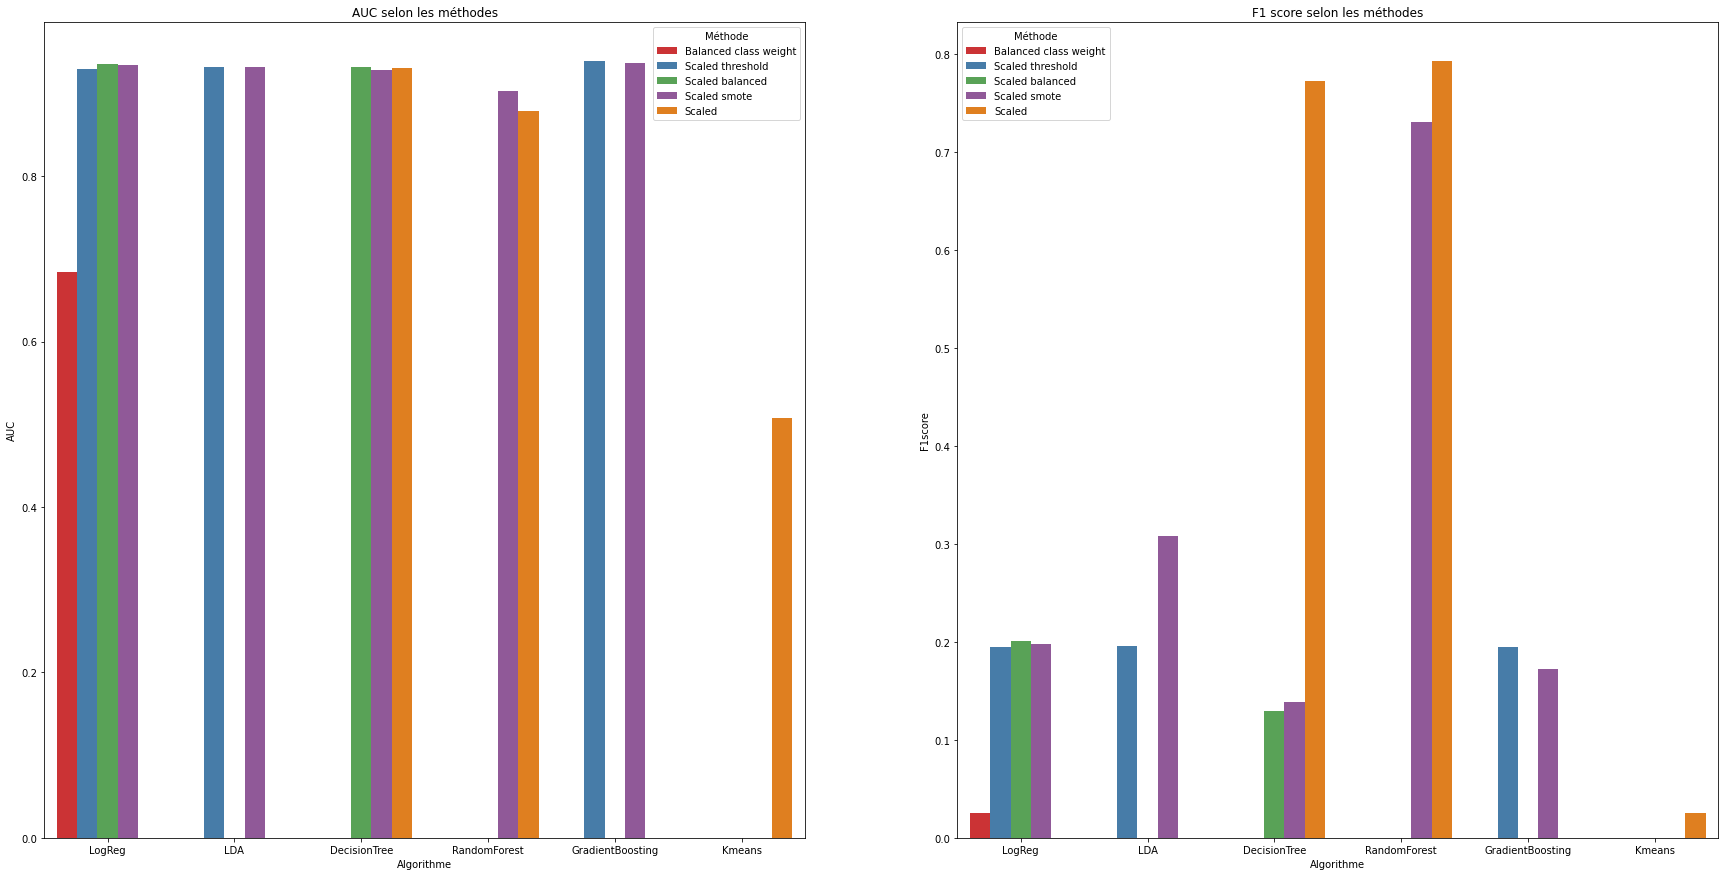

In [119]:
fig, axs = plt.subplots(ncols=2, figsize =(30,15))
sns.barplot(x = 'Algorithme', y= 'AUC', hue = 'Méthode', data = res, ax=axs[0], palette = 'Set1').set_title('AUC selon les méthodes')
sns.barplot(x = 'Algorithme', y= 'F1score', hue = 'Méthode', data = res, ax=axs[1], palette = 'Set1').set_title('F1 score selon les méthodes')
plt.show()

Nous avons utiliser pour évaluer la performance des modèles l'AUC et le F1-score. Nous pouvons voir que l'AUC ne permet pas de dégager une information parfaitement fiable.  En effet, là où certain modèle semble très bien prédire comme le Gradient Boosting, il existe un biais. Dans le cadre de déséquilibre de classe, la courbe de ROC n'est pas sensible au taux de déséquilibre car le traux de faux positif est stable quand le taux de faux négatif est élevé. Il aurait fallu si on voulait utiliser une courbe, utilisé la courbe Précision-Rappel. Le F1 score est plus performant dans le cadre de données déséquilibrées donc c'est celui que nous utiliserons pour évaluer nos modèles.

Premièrement nos tentatives avec l'algorithme non supervisé des Kmeans donne des résultats très médiocre, aussi bien sur l'AUC que le F1 score. Cette approche non supervisée est donc inintéressante dans ce contexte.

En terme de F1 score, les algorithmes qui se démarquent sont l'arbre de décision et les forêts aléatoires (en même temps, les forêts ne sont ni plus ni moins que des regroupements d'arbres). Cependant, ce ne sont pas ceux qui donnent les meilleurs résultats en terme d'AUC même si ils restent relativement bons. Ainsi sur des données simplement standarisée, on peut observer d'excellent résultat. De même sur les données standardisées rééquilibrées avec SMOTE pour les random forest. Là où sur les abres de décisions le F1 score est médiocre, le random forest permet de dégager un F1 score plus que satisfaisant. On peut observer une réelle faiblesse des arbres de décisions quand il s'agit de traiter des problèmes de données déséquilibrées, potentiellement palier par la technique des forêts aléatoires.

# 6. Conclusion et perspectives

Ainsi, lors de ce projet, nous avons été amenés à réaliser une classification dans un contexte particulier, à savoir avec une variable cible déséquilibrée où le nombre de positifs (les fraudes) étaient largement sous-représenté par rapport aux négatifs (les transactions normales). Nous avons pu voir le comportement des algorithmes de machine learning classique dans ce contexte, et comment il était possible de contrer ce problème. Notamment avec une mesure d'évaluation des modèles différente de celle utilisée habituellement, mais aussi des techniques de ré-échantillonage. 
Enfin, il pourrait être envisagé de réaliser, en amont des algorithmes supervisés ou non supervisés, des méthodes de réduction de dimension. Une autre piste à explorer serait les méthodes cost-sensitives, permettant d'accorder des poids à chaque classe et donc de pouvoir ré-équilibré le jeu de données. Pour terminer, une sélection des variables les plus pertinentes pour répondre au problème serait également envisageable.
